Sinc Function Approximation using MLP

In [2]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [ ]:
def custom_sinc(val):
    return 1 if val == 0 else np.sin(val) / val

In [ ]:
inputs = np.linspace(-10, 10, 1000).reshape(-1, 1)
outputs = np.array([custom_sinc(i[0]) for i in inputs])

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(50,50,50,20,50,50,50), activation='relu',
                     solver='adam', random_state=42, max_iter=500)
model.fit(inputs, outputs)

MLPRegressor(hidden_layer_sizes=(50, 50, 50, 20, 50, 50, 50), max_iter=500,
             random_state=42)

In [ ]:
eval_points = np.linspace(-10, 10, 200).reshape(-1, 1)
predictions = model.predict(eval_points)

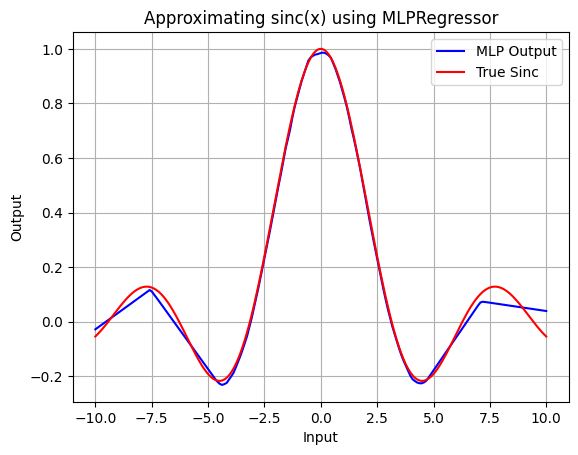

In [ ]:
plt.plot(eval_points, predictions, label='MLP Output', color='blue')
plt.plot(eval_points, [custom_sinc(x[0]) for x in eval_points], label='True Sinc', color='red')
plt.title('Approximating sinc(x) using MLPRegressor')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mlp_mse = mean_squared_error(outputs, model.predict(inputs))
mlp_r2 = r2_score(outputs, model.predict(inputs))
mlp_mae = mean_absolute_error(outputs, model.predict(inputs))
mlp_rmse = np.sqrt(mlp_mse)

print("MLPRegressor Metrics:")
print(f"Mean Squared Error: {mlp_mse}")
print(f"R-squared: {mlp_r2}")
print(f"Mean Absolute Error: {mlp_mae}")
print(f"Root Mean Squared Error: {mlp_rmse}")

MLPRegressor Metrics:
Mean Squared Error: 0.000633502888514779
R-squared: 0.9949029285000625
Mean Absolute Error: 0.018713331537209017
Root Mean Squared Error: 0.025169483278660667


Sinc Function Approximation using Tensorflow

In [98]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def my_sinc(z):
    return np.sinc(z / np.pi)

In [ ]:
train_x = np.linspace(-10, 10, 1000)
train_y = my_sinc(train_x)

In [ ]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model.compile(optimizer='adam', loss='mean_squared_error')

nn_model.fit(train_x, train_y, epochs=500, batch_size=32, verbose=0)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


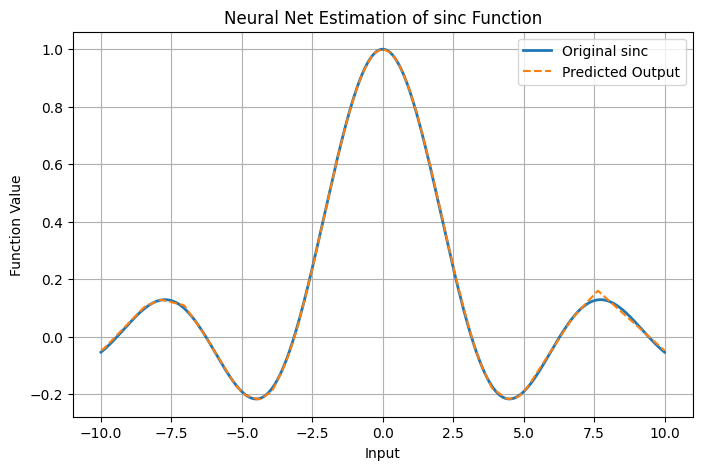

In [ ]:
test_x = np.linspace(-10, 10, 500)
true_y = my_sinc(test_x)
predicted_y = nn_model.predict(test_x)

plt.figure(figsize=(8, 5))
plt.plot(test_x, true_y, label='Original sinc', linewidth=2)
plt.plot(test_x, predicted_y, label='Predicted Output', linestyle='--')
plt.title('Neural Net Estimation of sinc Function')
plt.xlabel('Input')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

tf_mse = mean_squared_error(true_y, predicted_y)
tf_r2 = r2_score(true_y, predicted_y)
tf_mae = mean_absolute_error(true_y, predicted_y)
tf_rmse = np.sqrt(tf_mse)

print("\nTensorflow Model Metrics:")
print(f"Mean Squared Error: {tf_mse}")
print(f"R-squared: {tf_r2}")
print(f"Mean Absolute Error: {tf_mae}") 
print(f"Root Mean Squared Error: {tf_rmse}") 


Tensorflow Model Metrics:
Mean Squared Error: 2.6982526334306363e-05
R-squared: 0.999782770306521
Mean Absolute Error: 0.0035176939604548456
Root Mean Squared Error: 0.005194470746313465


Sinc Function Approximation using SVR

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [ ]:
def custom_sinc(z):
    return np.sinc(z / np.pi)

In [ ]:
np.random.seed(0)
input_data = np.linspace(-10, 10, 100).reshape(-1, 1)
output_data = custom_sinc(input_data).ravel()

In [ ]:
regressor = SVR(kernel='rbf', C=100, epsilon=0.01, gamma=0.1)
regressor.fit(input_data, output_data)

SVR(C=100, epsilon=0.01, gamma=0.1)

In [ ]:
x_eval = np.linspace(-10, 10, 500).reshape(-1, 1)
actual_output = custom_sinc(x_eval).ravel()
predicted_output = regressor.predict(x_eval)

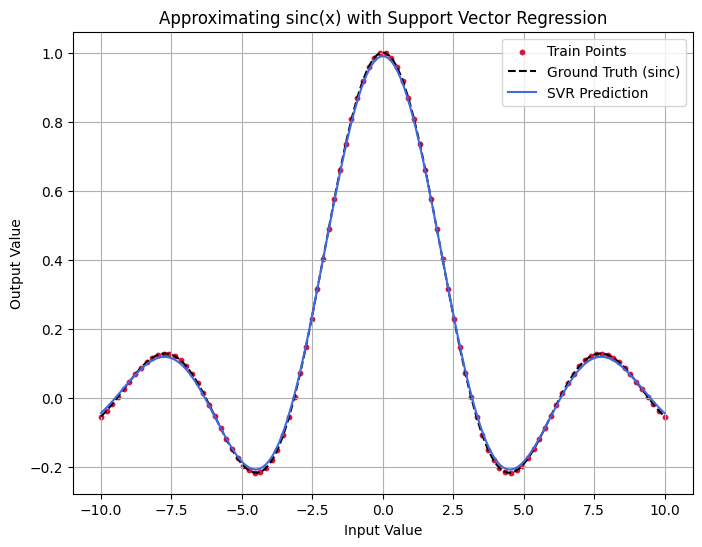

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(input_data, output_data, color='crimson', label='Train Points', s=10)
plt.plot(x_eval, actual_output, label='Ground Truth (sinc)', color='black', linestyle='--')
plt.plot(x_eval, predicted_output, label='SVR Prediction', color='royalblue')
plt.title("Approximating sinc(x) with Support Vector Regression")
plt.xlabel("Input Value")
plt.ylabel("Output Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
svr_mse = mean_squared_error(actual_output, predicted_output)
svr_r2 = r2_score(actual_output, predicted_output)
svr_mae = mean_absolute_error(actual_output, predicted_output)
svr_rmse = np.sqrt(svr_mse)

print("\nSVR Model Metrics:")
print(f"Mean Squared Error: {svr_mse}")
print(f"R-squared: {svr_r2}")
print(f"Mean Absolute Error: {svr_mae}") 
print(f"Root Mean Squared Error: {svr_rmse}") 


SVR Model Metrics:
Mean Squared Error: 5.3264562115080276e-05
R-squared: 0.9995711800904705
Mean Absolute Error: 0.006562544021344925
Root Mean Squared Error: 0.007298257471142018
